In [ ]:
import pandas as pd

# Load dataset
file_path = '/content/IMDb Movies India.csv'
movie_data = pd.read_csv(file_path, encoding='latin1')

# View basic info
print(movie_data.info())
print(movie_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Ro

In [ ]:
# Convert 'Year' to integer
movie_data['Year'] = movie_data['Year'].dropna().astype(int)

# Extract numeric values from 'Duration'
# Convert 'Duration' column to string type before using .str accessor
movie_data['Duration'] = movie_data['Duration'].astype(str)
movie_data['Duration'] = (
    movie_data['Duration']
    .str.extract('(\d+)')  # Extract numeric portion
    .dropna()
    .astype(int)
)

# Clean 'Votes' column
movie_data['Votes'] = (
    movie_data['Votes']
    .str.replace(r'[$,M]', '', regex=True)  # Remove $, commas, and 'M'
    .astype(float)  # Convert to numeric
)


# Handle missing values (fill or drop rows)
movie_data = movie_data.dropna(subset=['Rating'])  # Drop rows where 'Rating' is missing
movie_data['Genre'] = movie_data['Genre'].fillna('Unknown')
movie_data['Director'] = movie_data['Director'].fillna('Unknown')
movie_data['Actor 1'] = movie_data['Actor 1'].fillna('Unknown')

# Display cleaned dataset info
print(movie_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   float64
 2   Duration  5851 non-null   float64
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  7919 non-null   object 
 7   Actor 1   7919 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(4), object(6)
memory usage: 680.5+ KB
None


<ipython-input-4-371fec29365c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Genre'] = movie_data['Genre'].fillna('Unknown')
<ipython-input-4-371fec29365c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['Director'] = movie_data['Director'].fillna('Unknown')
<ipython-input-4-371fec29365c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

          Name         Year     Duration  Genre       Rating          Votes  \
count     7919  7919.000000  5851.000000   7919  7919.000000    7919.000000   
unique    7372          NaN          NaN    433          NaN            NaN   
top     Anjaam          NaN          NaN  Drama          NaN            NaN   
freq         5          NaN          NaN   1177          NaN            NaN   
mean       NaN -1993.321758   132.294480    NaN     5.841621    1938.520394   
std        NaN    20.463770    26.555826    NaN     1.381777   11602.415952   
min        NaN -2021.000000    21.000000    NaN     1.100000       5.000000   
25%        NaN -2011.000000   117.000000    NaN     4.900000      16.000000   
50%        NaN -1997.000000   134.000000    NaN     6.000000      55.000000   
75%        NaN -1979.500000   150.000000    NaN     6.800000     404.000000   
max        NaN -1917.000000   321.000000    NaN    10.000000  591417.000000   

            Director    Actor 1 Actor 2 Actor 3  
c

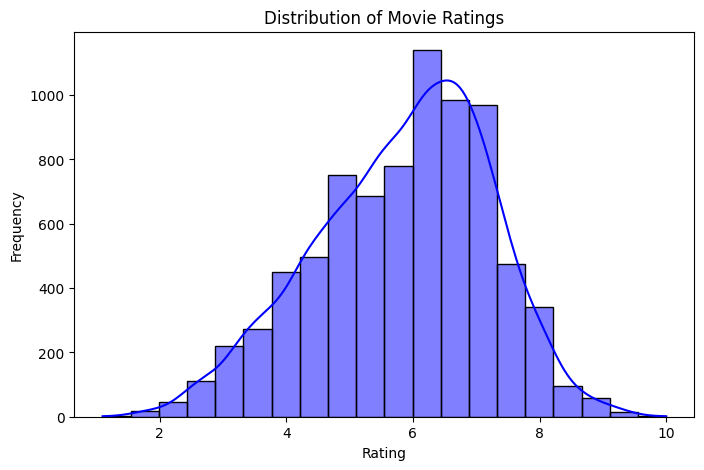

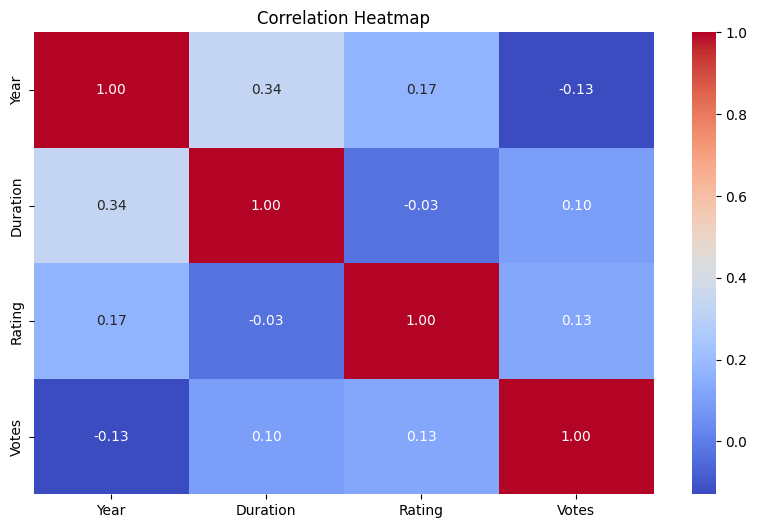

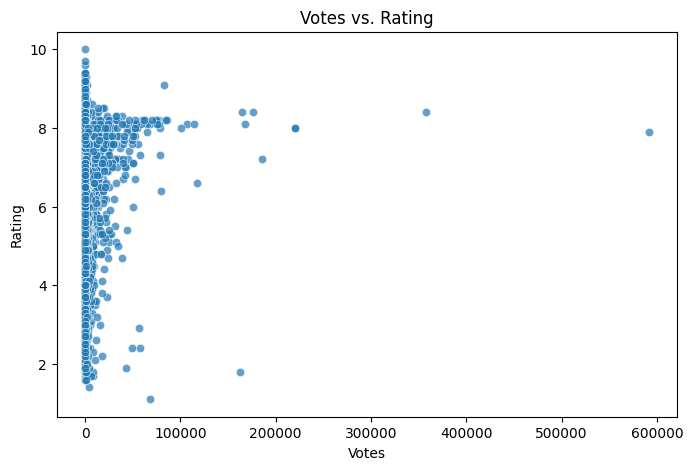

<ipython-input-5-68b2d6ec14e6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


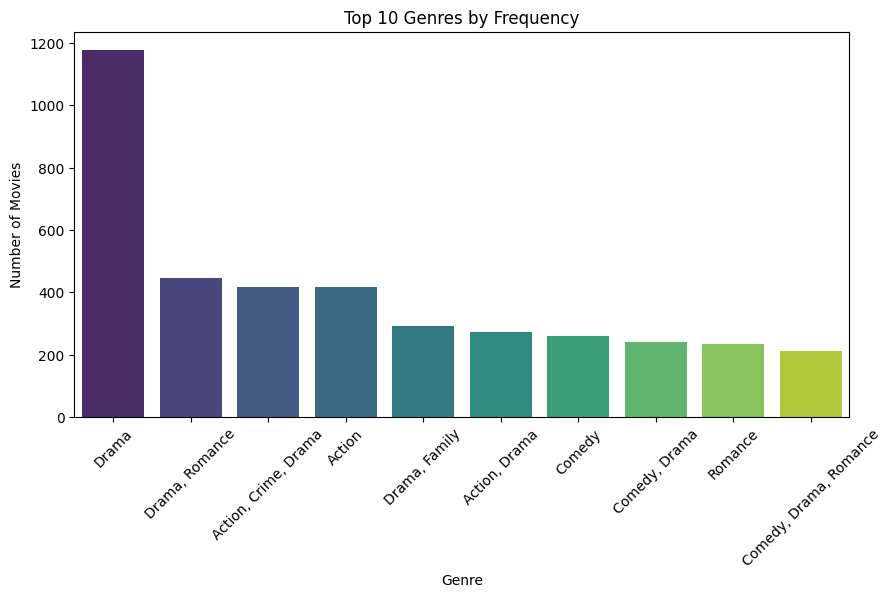

<ipython-input-5-68b2d6ec14e6>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Rating', data=filtered_data, palette='Set2')


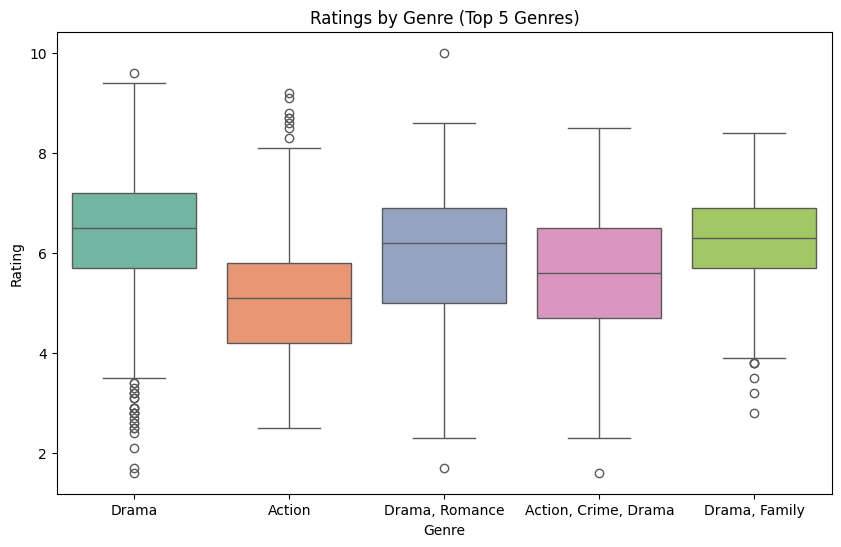

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(movie_data.describe(include='all'))

# Check for missing values
missing_values = movie_data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Distribution of the target variable (Rating)
plt.figure(figsize=(8, 5))
sns.histplot(movie_data['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
# Include numeric_only=True to consider only numerical features for correlation
correlation = movie_data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Analyze the relationship between 'Votes' and 'Rating'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Votes', y='Rating', data=movie_data, alpha=0.7)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

# Analyze the top genres
top_genres = movie_data['Genre'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Frequency')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.show()

# Boxplot of Ratings by Genre (for the top 5 genres)
top_5_genres = top_genres.index[:5]
filtered_data = movie_data[movie_data['Genre'].isin(top_5_genres)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Rating', data=filtered_data, palette='Set2')
plt.title('Ratings by Genre (Top 5 Genres)')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'Genre' (example with a single column)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output instead of sparse
genre_encoded = encoder.fit_transform(movie_data[['Genre']])

# Convert to DataFrame and add back
genre_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))
movie_data = pd.concat([movie_data, genre_df], axis=1)

# Drop the original 'Genre' column
movie_data = movie_data.drop(columns=['Genre'])

# Display a sample of the dataset
movie_data.head()


,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Action,...,Genre_Sci-Fi,"Genre_Sci-Fi, Thriller",Genre_Sport,Genre_Thriller,"Genre_Thriller, Action","Genre_Thriller, Musical, Mystery","Genre_Thriller, Mystery","Genre_Thriller, Mystery, Family",Genre_Unknown,Genre_War
1,#Gadhvi (He thought he was Gandhi),-2019.0,109.0,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#Yaaram,-2019.0,110.0,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,...Aur Pyaar Ho Gaya,-1997.0,147.0,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,...Yahaan,-2005.0,142.0,7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,?: A Question Mark,-2012.0,82.0,5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Define Features and Target
X = movie_data.drop(columns=['Rating', 'Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], errors='ignore')  # Drop non-numeric or unused columns
y = movie_data['Rating']  # Target variable

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Shapes of the Splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (9354, 436)
Testing Features Shape: (2339, 436)
Training Target Shape: (9354,)
Testing Target Shape: (2339,)


In [ ]:
# Remove rows with NaN in y_train
X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

In [ ]:
# Impute NaN values in y_test (e.g., using the mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median'

# Reshape y_test to a 2D array for imputation
y_test_reshaped = y_test.values.reshape(-1, 1)

# Impute NaN values in y_test_reshaped
y_test_imputed = imputer.fit_transform(y_test_reshaped)

# Reshape back to 1D array
y_test = y_test_imputed.ravel()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Predict on the Test Set
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse_rf = mean_squared_error(y_test, y_pred)  # Changed mse to mse_rf
r2_rf = r2_score(y_test, y_pred)  # Changed r2 to r2_rf

print(f"Random Forest Regressor MSE: {mse_rf:.2f}")  # Changed mse to mse_rf
print(f"Random Forest Regressor R²: {r2_rf:.2f}")  # Changed r2 to r2_rf

Random Forest Regressor MSE: 1.30
Random Forest Regressor R²: 0.01


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor MSE: {mse_tree:.2f}")
print(f"Decision Tree Regressor R²: {r2_tree:.2f}")


Decision Tree Regressor MSE: 2.00
Decision Tree Regressor R²: -0.53


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with the desired strategy
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor MSE: {mse_gb:.2f}")
print(f"Gradient Boosting Regressor R²: {r2_gb:.2f}")


Gradient Boosting Regressor MSE: 1.01
Gradient Boosting Regressor R²: 0.23


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regressor MSE: {mse_svr:.2f}")
print(f"Support Vector Regressor R²: {r2_svr:.2f}")


Support Vector Regressor MSE: 1.27
Support Vector Regressor R²: 0.03


In [ ]:
models_metrics = {

    "Decision Tree": [mse_tree, r2_tree],
    "Random Forest": [mse_rf, r2_rf],
    "Gradient Boosting": [mse_gb, r2_gb],
    "Support Vector Regressor": [mse_svr, r2_svr],

}

for model, metrics in models_metrics.items():
    print(f"{model} - MSE: {metrics[0]:.2f}, R²: {metrics[1]:.2f}")


Decision Tree - MSE: 2.00, R²: -0.53
Random Forest - MSE: 1.30, R²: 0.01
Gradient Boosting - MSE: 1.01, R²: 0.23
Support Vector Regressor - MSE: 1.27, R²: 0.03


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',  # Use negative MSE as scoring
    verbose=2
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model MSE: {mse_best:.2f}")
print(f"Best Model R² Score: {r2_best:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  29.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.9s
[CV] END max_depth=10, min_sa

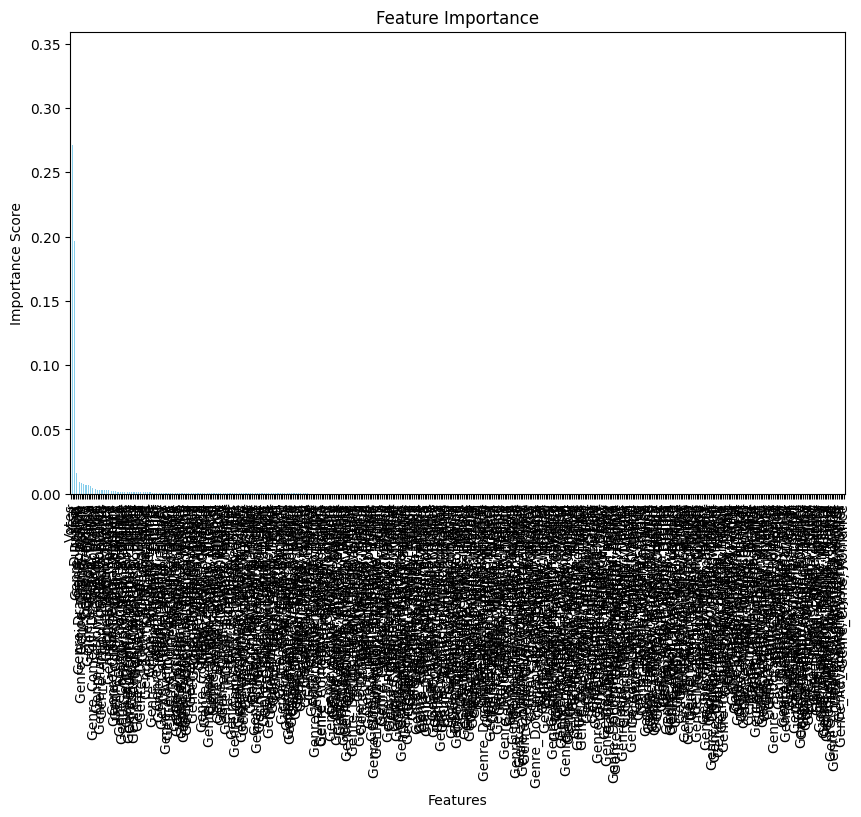

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importance from the model
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('random_forest_model.pkl')
